In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Parcel Data with Basement Flooding Calls

Aggregated to community area, [parcel data from Cook County](http://cookviewer1.cookcountyil.gov/jsviewer/mapviewer.html) can be compared with community area level counts of basement flooding calls. Overall, it seems there's a moderate correlation mostly with mean parcel value for an area and number of basement flooding 311 calls.

In [2]:
flood_comm_df = pd.read_csv('311_data/wib_calls_311_comm.csv')
flood_comm_stack_df = pd.DataFrame(flood_comm_df.stack()).reset_index()
flood_comm_stack_df = flood_comm_stack_df.rename(columns={'level_0':'Date','level_1':'Community Area',0:'Count Calls'})
flood_comm_totals = pd.DataFrame(flood_comm_stack_df.groupby(['Community Area'])['Count Calls'].sum()).reset_index()
flood_comm_totals.head()

,Community Area,Count Calls
0,ALBANY PARK,1949
1,ARCHER HEIGHTS,720
2,ARMOUR SQUARE,216
3,ASHBURN,4115
4,AUBURN GRESHAM,5565


In [3]:
parcel_comm_df = pd.read_csv('parcel_data/res_parcel_stats_by_comm.csv')
parcel_comm_df = parcel_comm_df.rename(columns={'CommunityArea': 'Community Area'})
parcel_comm_df = parcel_comm_df[['Community Area', 'MeanBldgAge', 'ParcelCount', 'MeanBldgValue']]
parcel_comm_df.head()

,Community Area,MeanBldgAge,ParcelCount,MeanBldgValue
0,ALBANY PARK,88.012670,6314,31204.790624
1,ARCHER HEIGHTS,71.006517,2762,14332.396452
2,ARMOUR SQUARE,64.962375,1701,32358.594944
3,ASHBURN,58.554936,12369,12046.872100
4,AUBURN GRESHAM,83.526665,11457,11237.561404


In [4]:
flood_parcel_df = flood_comm_totals.merge(parcel_comm_df, on='Community Area')
flood_parcel_df['Count Calls'] = flood_parcel_df['Count Calls'].astype(int)
flood_parcel_df.head()

,Community Area,Count Calls,MeanBldgAge,ParcelCount,MeanBldgValue
0,ALBANY PARK,1949,88.012670,6314,31204.790624
1,ARCHER HEIGHTS,720,71.006517,2762,14332.396452
2,ARMOUR SQUARE,216,64.962375,1701,32358.594944
3,ASHBURN,4115,58.554936,12369,12046.872100
4,AUBURN GRESHAM,5565,83.526665,11457,11237.561404


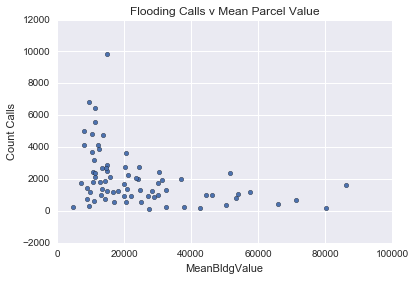

In [5]:
# The Loop, Near North Side, and Lincoln Park are outliers, so removing them
flood_parcel_sub = flood_parcel_df.loc[~flood_parcel_df['Community Area'].isin(['LOOP', 'NEAR NORTH SIDE', 'LINCOLN PARK'])].copy()
flood_parcel_sub.plot(title='Flooding Calls v Mean Parcel Value', kind='scatter', x='MeanBldgValue', y='Count Calls')

In [6]:
flood_parcel_sub.corr()

,Count Calls,MeanBldgAge,ParcelCount,MeanBldgValue
Count Calls,1.000000,0.201429,0.742777,-0.376962
MeanBldgAge,0.201429,1.000000,0.187132,-0.380951
ParcelCount,0.742777,0.187132,1.000000,-0.168567
MeanBldgValue,-0.376962,-0.380951,-0.168567,1.000000


### Next Steps

The correlation to mean building value is modest, but community area seems like too high a level of aggregation to actually capture any disparities. Could potentially aggregate by parcels within a given radius of the geocoded point for a given call on an address block.